<a href="https://colab.research.google.com/github/TitoBotelho/CalculandoMetricasMachineLearning/blob/main/Matriz_de_Confus%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matriz de confusão

Calculando métricas de avaliação de desempenho para modelos de Machine Learning


Referências:

https://colab.research.google.com/github/FlaysonSantos/Matriz_de_Confusao/blob/main/Matriz_de_Confus%C3%A3o.ipynb

Primeiro, vamos supor um array de valores reais e um de valores preditos:

In [ ]:
valoresReais = [0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0]
valoresPreditos = [1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0]

In [ ]:
#Declarando variáveis vazias para guardar os valores do looping

verdadeiroPositivo = 0 #o valor real é verdadeiro e o modelo previu verdadeiro (1,1)
verdadeiroNegativo = 0 #o valor real é negativo e o sistema previu negativo (0,0)
falsoPositivo = 0 # o valor real é negativo e o sistema previu positivo (0,1)
falsoNegativo = 0 #o valor real é positivo e o sistema previu negativo (1,0)


#um loop simples compara cada íncice do array de valores reais com o de valores previstos
for i in range(len(valoresReais)):


    #se o valor real for 1 e o valor previsto for 1, adiciona um na variável de verdadeiro positivo
    if (valoresReais[i] == 1 and valoresPreditos[i]== 1):
      verdadeiroPositivo = verdadeiroPositivo +1

    #se o valor real for 0 e o valor previsto for 0, adiciona um na variável de verdadeiro negativo
    if (valoresReais[i] == 0 and valoresPreditos[i]== 0):
      verdadeiroNegativo = verdadeiroNegativo +1      

    #se o valor real for 0 e o valor previsto for 1, adiciona um na variável de falso positivo
    if (valoresReais[i] == 0 and valoresPreditos[i]== 1):
      falsoPositivo = falsoPositivo +1   

    #se o valor real for 1 e o valor previsto for 0, adiciona um na variável de falso negativo
    if (valoresReais[i] == 1 and valoresPreditos[i]== 0):
      falsoNegativo = falsoNegativo +1 


#imprimir os valores:
print(verdadeiroPositivo)
print(verdadeiroNegativo)
print(falsoPositivo)
print(falsoNegativo)

11
12
3
4


In [ ]:
#Matriz de confusão é feita a partir dos valores calculados
matrizConfusão = [[verdadeiroPositivo, falsoNegativo], [falsoPositivo, verdadeiroNegativo]]
matrizConfusão



[[11, 4], [3, 12]]

In [ ]:
#Podemos também fazer a matriz de confusão a partir da biblioteca pronta
from sklearn import metrics

conf = metrics.confusion_matrix(valoresReais, valoresPreditos, labels=[1,0])
conf


array([[11,  4],
       [ 3, 12]])

Text(0.5, 15.0, 'Valores Preditos')

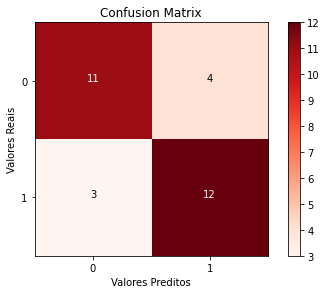

In [ ]:
#imprimindo a matriz de confusão a partir das bibliotecas:

import numpy as np
import matplotlib.pyplot as plt
import itertools


classes = [0, 1]
# plot confusion matrix
plt.imshow(conf, interpolation='nearest', cmap=plt.cm.Reds)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = conf.max() / 2.
for i, j in itertools.product(range(conf.shape[0]), range(conf.shape[1])):
    plt.text(j, i, format(conf[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('Valores Reais')
plt.xlabel('Valores Preditos')

# Calculando Métricas:

# Acurácia:

A acurácia é definida pelo (total de acertos) / (total de itens)


In [ ]:
acuracia = (verdadeiroPositivo + verdadeiroNegativo) / (verdadeiroPositivo + verdadeiroNegativo + falsoPositivo + falsoNegativo)
acuracia

0.7666666666666667

# Sensibilidade:
A sensibilidade é definida pelo (verdadeiro positivo) / (verdadeiro positivo + falso negativo)


In [ ]:
sensibilidade = (verdadeiroPositivo) / (verdadeiroPositivo + falsoNegativo)
sensibilidade

0.7333333333333333

# Especificidade:

A capacidade do método de detectar resultados negativos.


In [ ]:
especificidade = (verdadeiroNegativo) / (verdadeiroNegativo + falsoPositivo)
especificidade

0.8

# Precisão:
É a quantidade de verdadeiros positivos sobre a soma de todos os valores positivos:


In [ ]:
precisao = (verdadeiroPositivo) / (verdadeiroPositivo + falsoPositivo)
precisao

0.7857142857142857

# F-Score:
É uma média harônica calculada com base na precisão e na revocação

In [ ]:
f1 = 2* (precisao * sensibilidade) / (precisao + sensibilidade)
f1

0.7586206896551724